## Demo for learning dual channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='zernike',channeltype='MF',sysfile='MF')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high/'
L.param.savename = L.param.datapath + 'psfmodel1'
L.param.keyword = '60nm' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 10
L.param.ccd_offset = 2210
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.06 # micron, equal to z_step*stepsize_of_the_data
L.param.ref_channel = 0 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.max_bead_number = 100 
L.param.roi.peak_height = 0.4 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.batch_size = 10 # lower this number if out of memory 
L.param.loss_weight.smooth = 0
L.param.PSFtype = 'zernike'

##### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\010_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\002_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\003_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\004_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\005_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\006_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\007_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\008_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\009_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\001_560_60nmStep_99laser.tif
(9, 10, 100, 170, 17

3/6: learning: 69/100 [00:19s]  3.53it/s, current loss: 7.24159, total time: 19.54s
3/6: learning: 58/100 [00:16s]  3.62it/s, current loss: 7.12283, total time: 35.55s
3/6: learning: 56/100 [00:15s]  3.66it/s, current loss: 7.09234, total time: 50.86s
3/6: learning: 52/100 [00:14s]  3.62it/s, current loss: 7.08748, total time: 65.23s
3/6: learning: 57/100 [00:15s]  3.60it/s, current loss: 6.48894, total time: 81.08s
3/6: learning: 55/100 [00:15s]  3.61it/s, current loss: 6.96397, total time: 96.32s
3/6: learning: 99/100 [00:27s]  3.58it/s, current loss: 7.02830, total time: 123.98s  
3/6: learning: 52/100 [00:14s]  3.56it/s, current loss: 6.96724, total time: 138.57s
3/6: learning: 63/100 [00:17s]  3.55it/s, current loss: 7.13449, total time: 156.31s
3/6: learning: 149/250 [06:33s]  2.64s/it, current loss: 62.64304, total time: 549.99s
4/6: calculating spline coefficients: 9/9 [00:31s]  3.45s/it total time: 580.89s
5/6: localization: 10/10 [04:53s] 29.39s/it total time: 874.78s


outlier id: [ 2  5  6  7  8 14 34 37 41 43]
rois shape channel 0: (34, 87, 21, 21)
rois shape channel 1: (34, 87, 21, 21)
rois shape channel 2: (34, 87, 21, 21)
rois shape channel 3: (34, 87, 21, 21)
rois shape channel 4: (34, 87, 21, 21)
rois shape channel 5: (34, 87, 21, 21)
rois shape channel 6: (34, 87, 21, 21)
rois shape channel 7: (34, 87, 21, 21)
rois shape channel 8: (34, 87, 21, 21)


3/6: learning: 180/250 [06:17s]  2.10s/it, current loss: 62.85655, total time: 1252.54s
4/6: calculating spline coefficients: 9/9 [00:30s]  3.44s/it total time: 1283.42s
5/6: localization: 10/10 [01:25s]  8.58s/it total time: 1369.17s
6/6: saving results: [01:02s] total time: 1431.37s


##### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

In [7]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


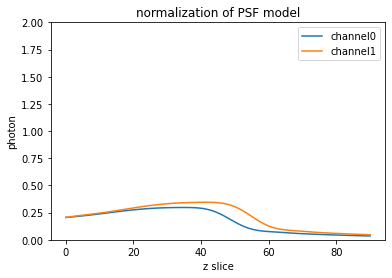

In [8]:
plt.plot(np.sum(f.res.channel0.I_model,axis=(-1,-2)),label='channel0')
plt.plot(np.sum(f.res.channel1.I_model,axis=(-1,-2)),label='channel1')
plt.ylim([0,2])
plt.xlabel("z slice")
plt.ylabel("photon")
plt.title("normalization of PSF model")
plt.legend()
plt.show()

channel 0


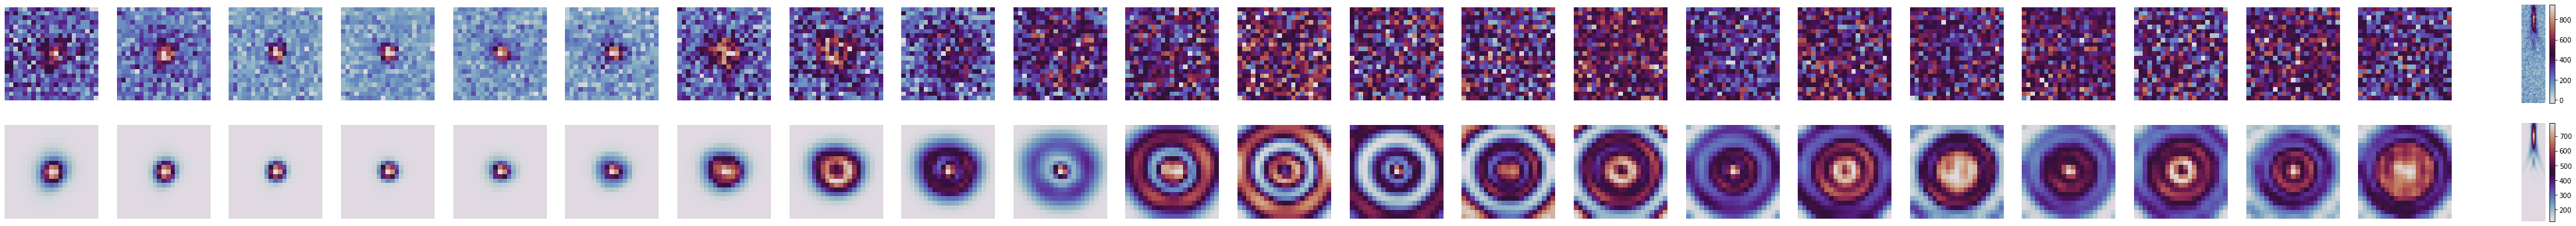

channel 1


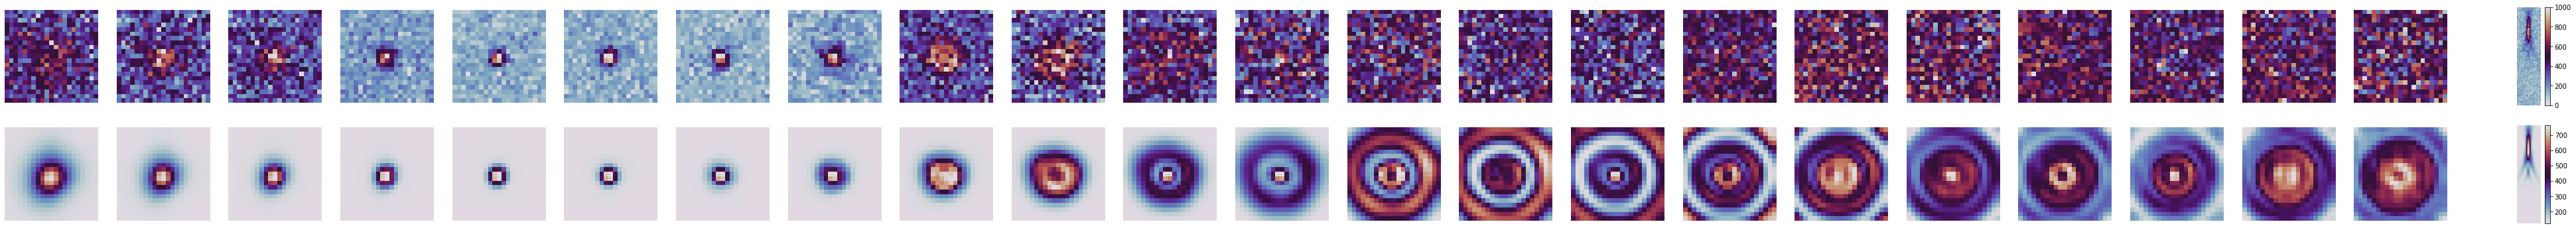

channel 2


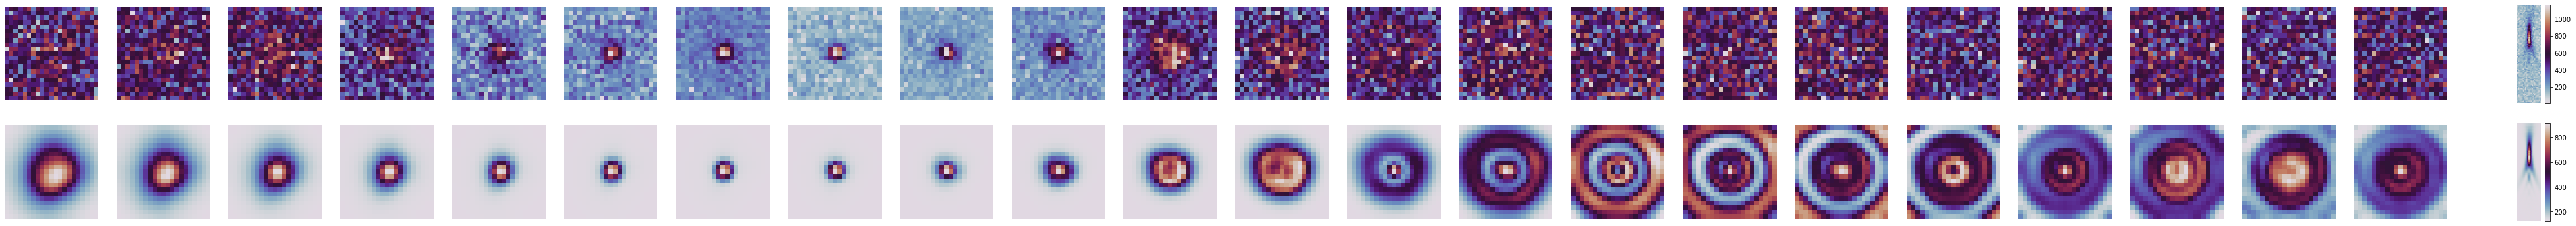

channel 3


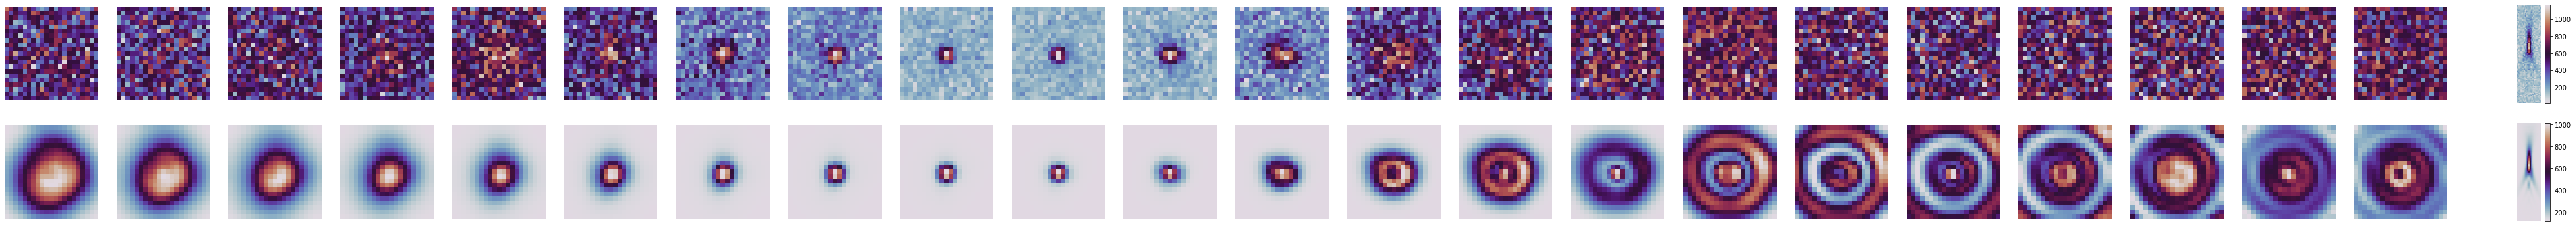

channel 4


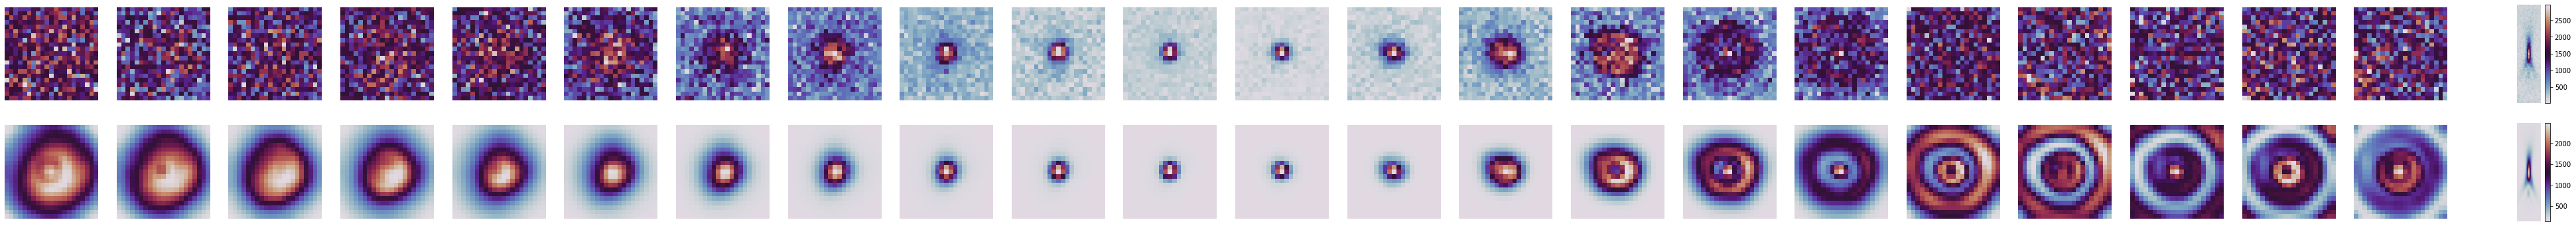

channel 5


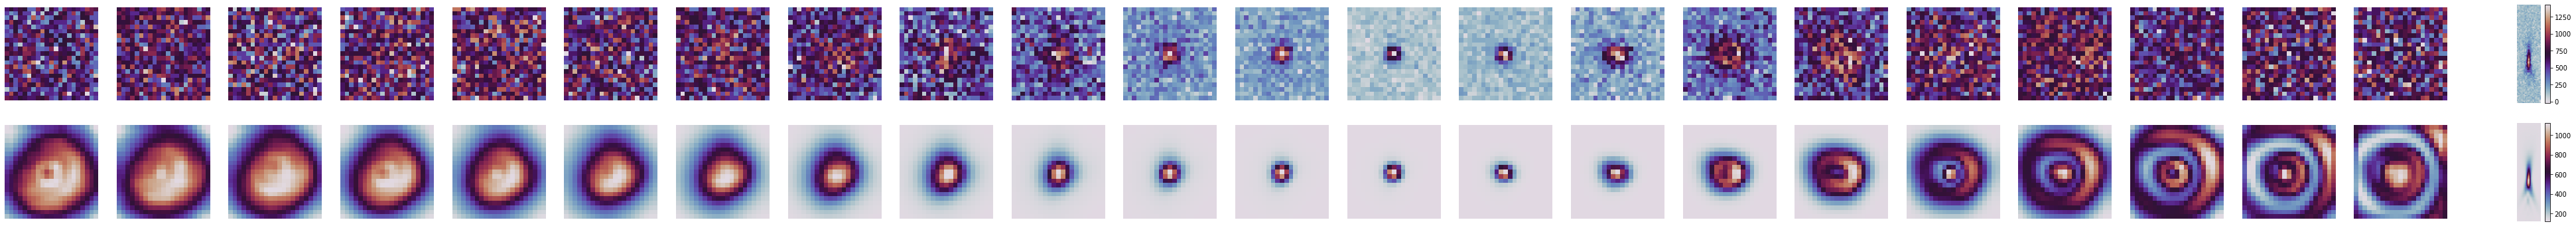

channel 6


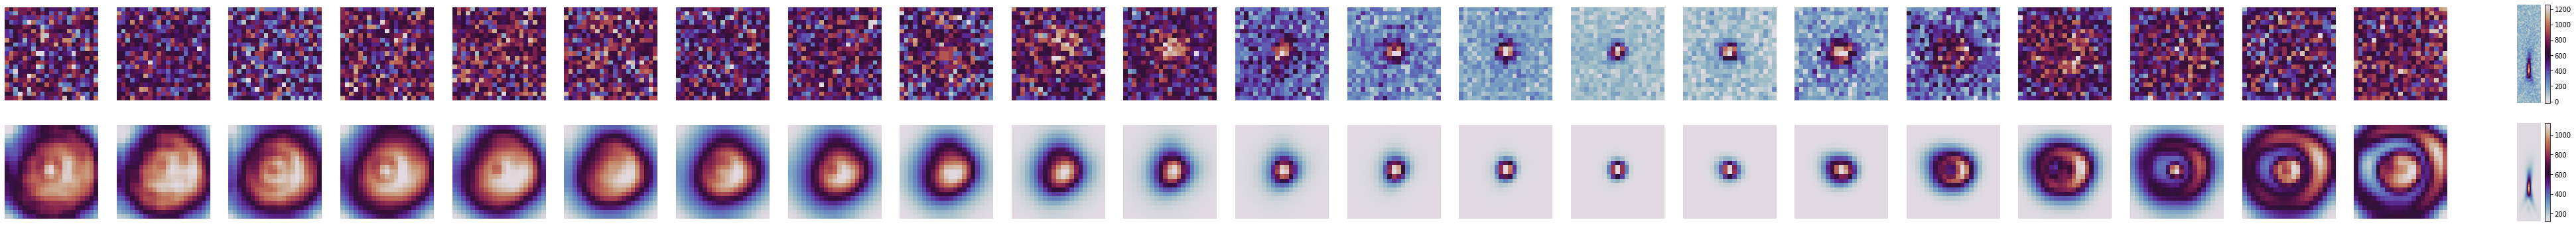

channel 7


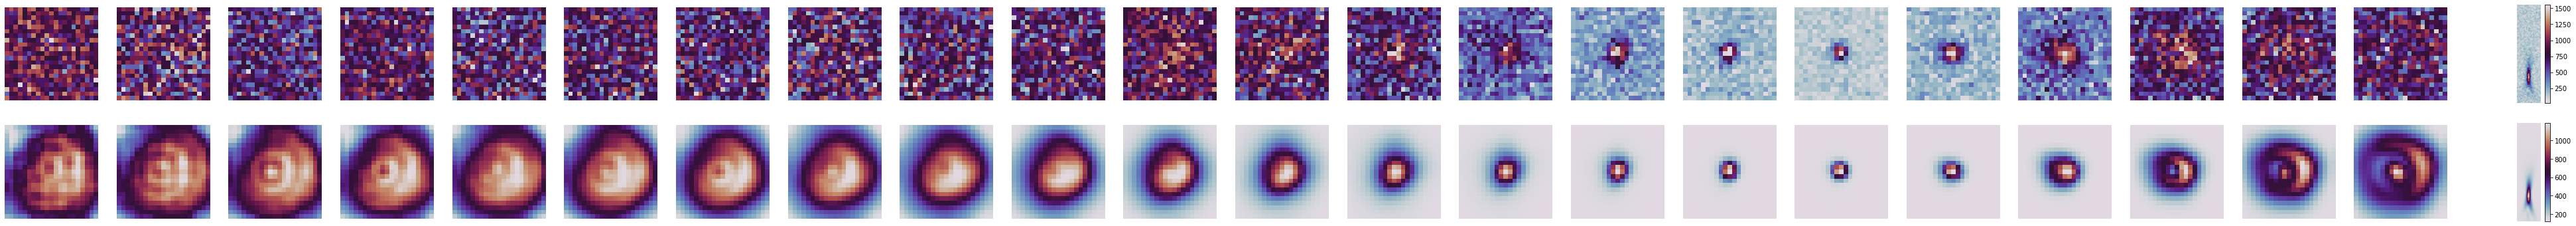

channel 8


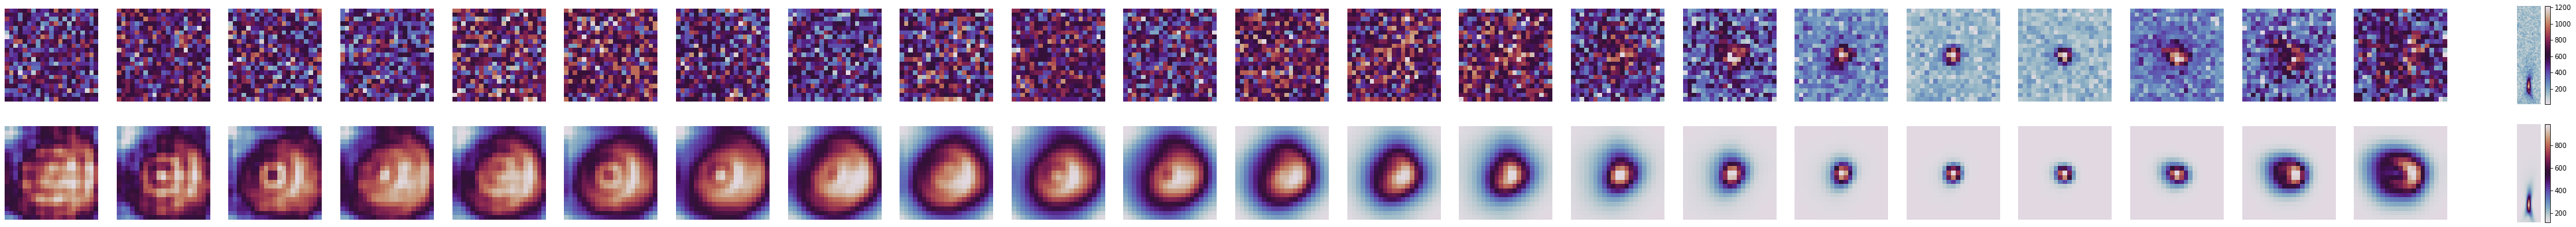

In [9]:
showpsfvsdata(f,p,index=0)

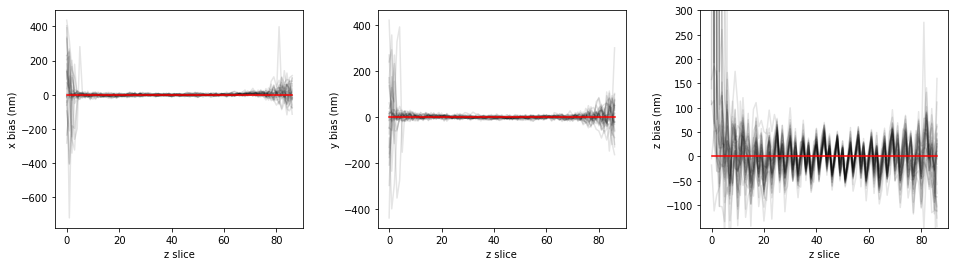

In [10]:
showlocalization(f,p)

##### Optional plots

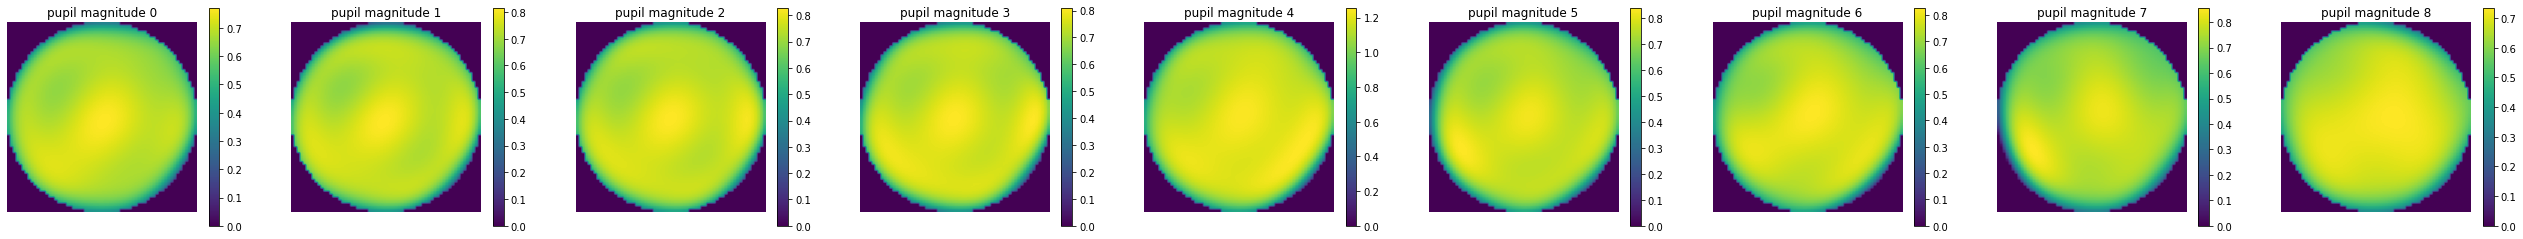

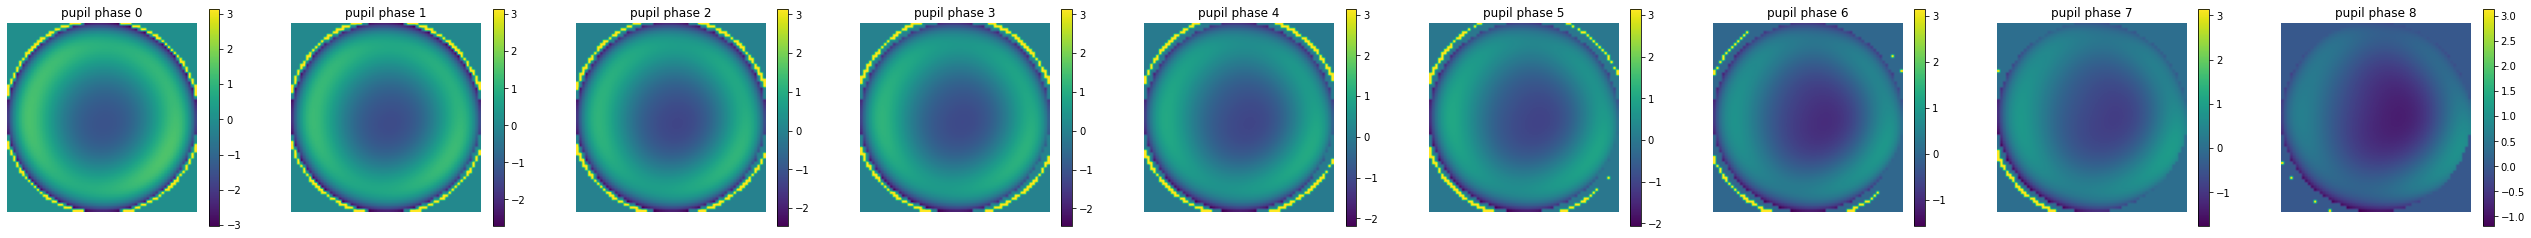

In [10]:
try:
    showpupil(f,p)
except:
    print('no pupil')

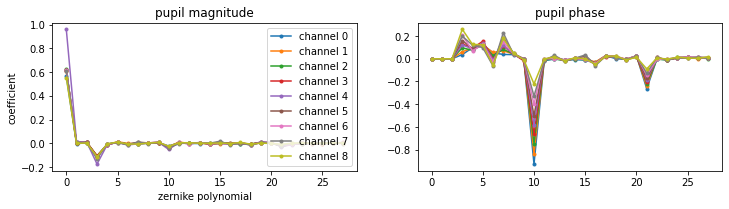

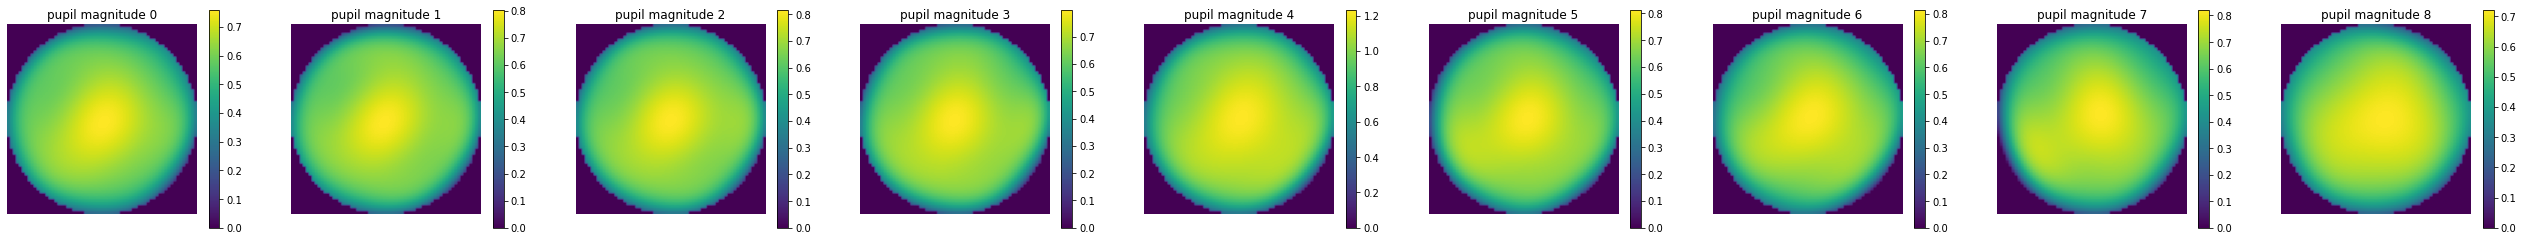

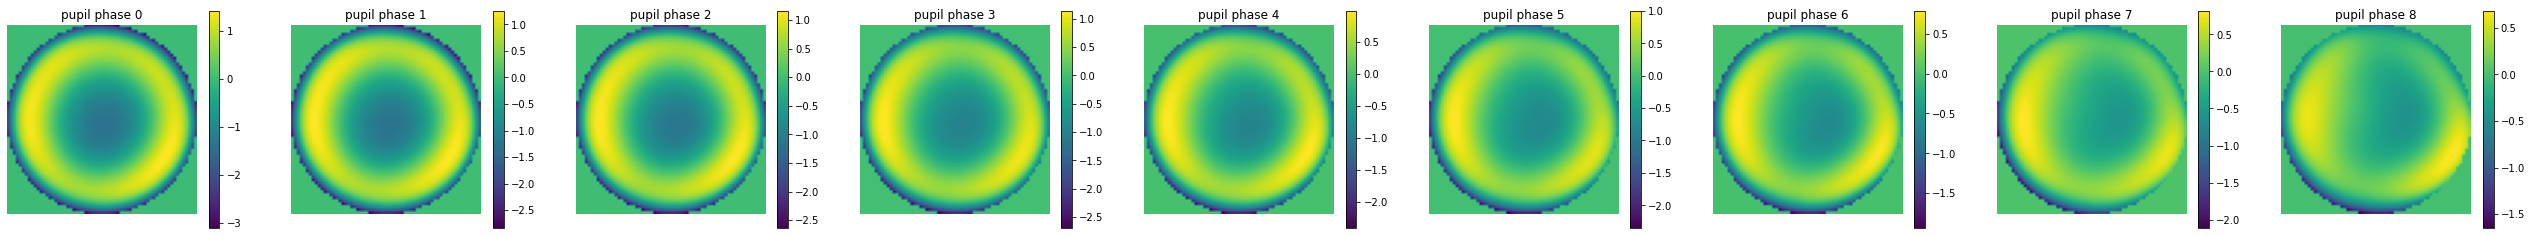

In [12]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[[ 0.9995 -0.0011 -0.    ]
  [-0.0026  0.9999  0.    ]
  [ 0.6906  5.2529  1.    ]]

 [[ 0.999  -0.0019 -0.    ]
  [-0.0053  1.0003  0.    ]
  [ 2.0992 10.8384  1.    ]]

 [[ 0.9956 -0.0002 -0.    ]
  [-0.      0.9982  0.    ]
  [ 6.3492 -1.1726  1.    ]]

 [[ 0.9962 -0.0008 -0.    ]
  [-0.0024  0.9991  0.    ]
  [ 6.8398  3.6011  1.    ]]

 [[ 0.9951 -0.0019 -0.    ]
  [-0.0047  0.9991  0.    ]
  [ 8.4513  8.3132  1.    ]]

 [[ 0.9916 -0.0004 -0.    ]
  [-0.      0.998   0.    ]
  [13.3324 -3.2299  1.    ]]

 [[ 0.9913 -0.0009 -0.    ]
  [-0.0021  0.9976  0.    ]
  [13.6732  1.4268  1.    ]]

 [[ 0.9904 -0.0012 -0.    ]
  [-0.0045  0.9973  0.    ]
  [15.2175  6.7064  1.    ]]]


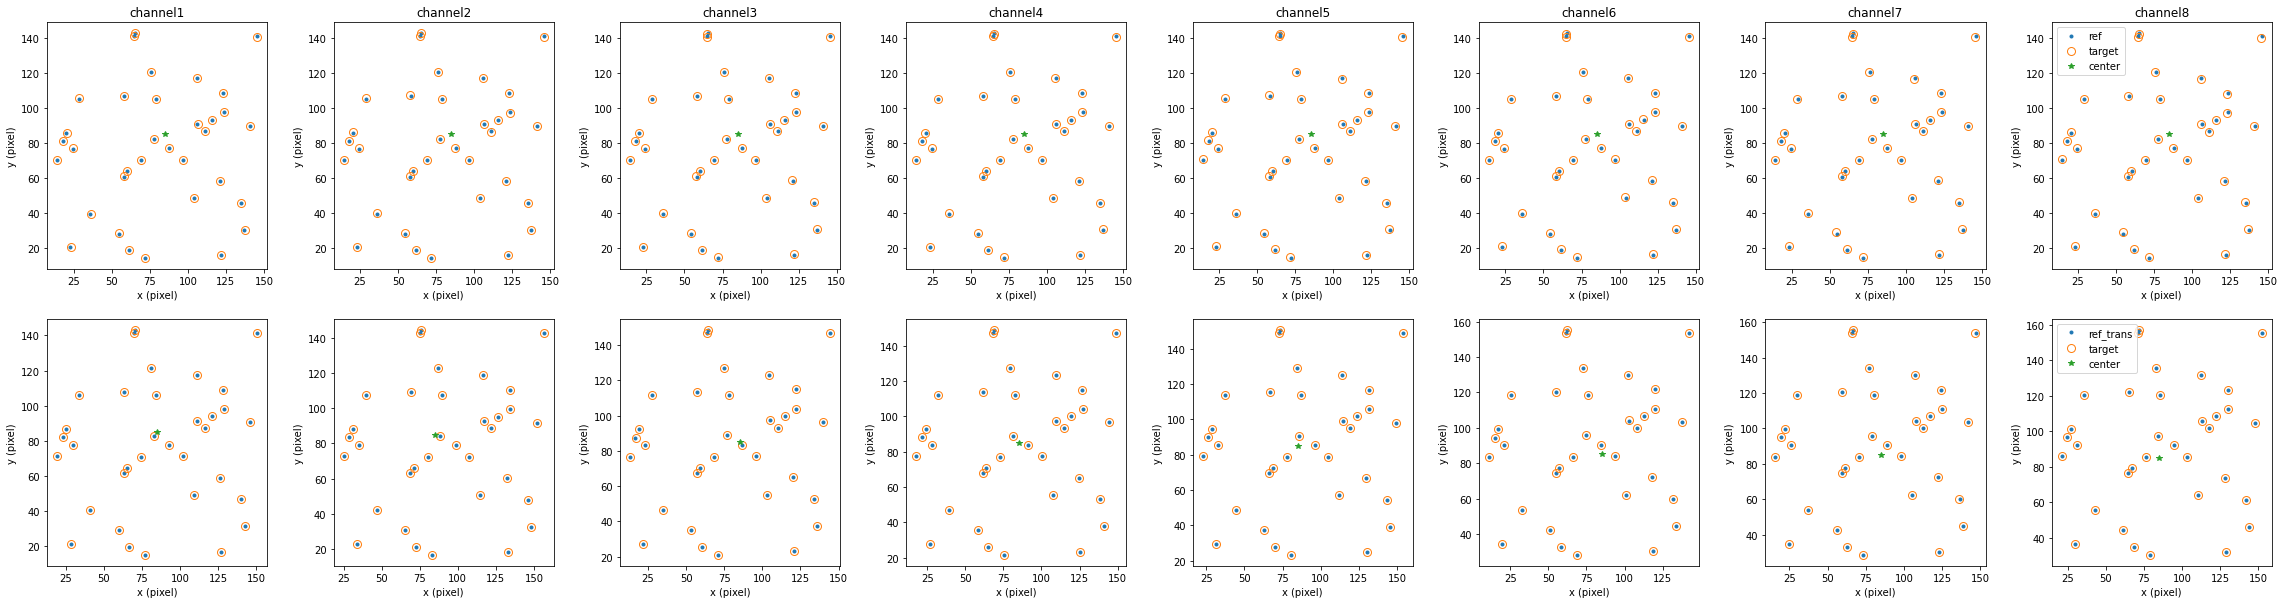

In [13]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

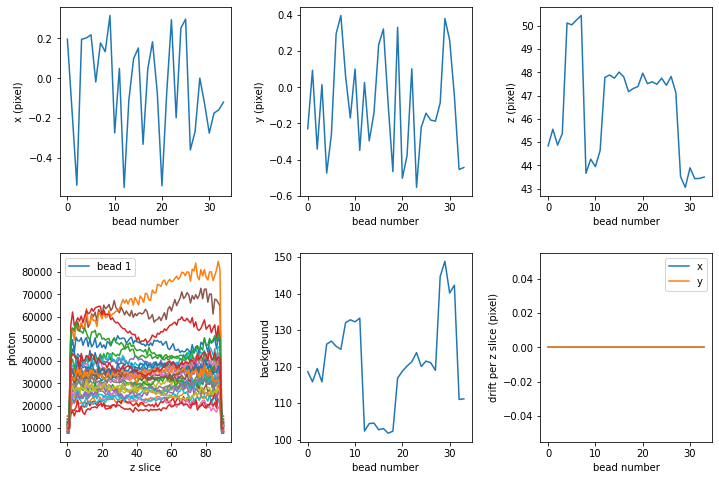

In [14]:
showlearnedparam(f,p)

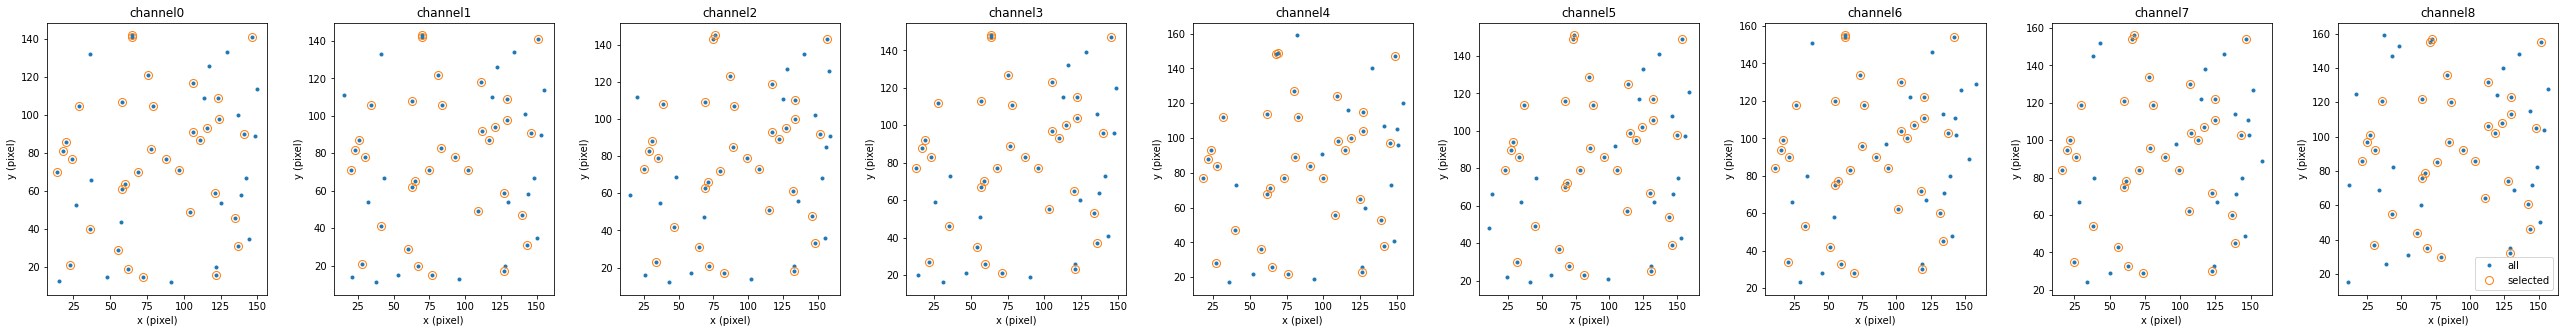

In [15]:
showcoord(f,p)